## Classification and Regression Tree (CART)

![image.png](1.png)

![image.png](2.png)

![image.png](3.png)

![image.png](4.png)

![image.png](6.png)

In [46]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  

In [47]:
gr= pd.read_csv('grbooks.csv')
gr.head(3)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585


In [48]:
gr.columns

Index(['author_average_rating', 'author_gender', 'author_genres', 'author_id',
       'author_name', 'author_page_url', 'author_rating_count',
       'author_review_count', 'birthplace', 'book_average_rating',
       'book_fullurl', 'book_id', 'book_title', 'genre_1', 'genre_2',
       'num_ratings', 'num_reviews', 'pages', 'publish_date', 'score'],
      dtype='object')

In [49]:
cols=['author_average_rating', 'author_gender',  'author_rating_count','author_review_count',  
      'book_average_rating', 'num_ratings', 'num_reviews',  'score']
grnew = gr[cols]
grnew.head()

,author_average_rating,author_gender,author_rating_count,author_review_count,book_average_rating,num_ratings,num_reviews,score
0,4.01,female,74399,6268,4.02,5260,375,3230
1,4.15,male,3726435,142704,4.13,2229163,65227,3062
2,4.00,female,76496,7975,3.99,2151,391,4585
3,3.88,male,5522,489,4.14,1844,173,1533
4,4.10,female,291013,13453,4.01,17051,1890,2105


Find out how many of each species the data set has.

In [50]:
grnew.isna().sum()

author_average_rating    0
author_gender            0
author_rating_count      0
author_review_count      0
book_average_rating      0
num_ratings              0
num_reviews              0
score                    0
dtype: int64

In [51]:
grnew.dtypes

author_average_rating    float64
author_gender             object
author_rating_count        int64
author_review_count        int64
book_average_rating      float64
num_ratings                int64
num_reviews                int64
score                      int64
dtype: object

In [52]:
grnew.score.describe()

count     22891.000000
mean       3893.028483
std       11022.018268
min          55.000000
25%         832.000000
50%        1727.000000
75%        3597.500000
max      598270.000000
Name: score, dtype: float64

In [54]:
grnew.loc[:,'author_labels'] = ["rookie" if x<1000 else "skilled" if  1000<=x< 2000 else "proficient"
                              if  2000<=x< 8000 else"expert"  for x in gr['score']]

In [55]:
grnew.author_labels.value_counts()

proficient    7912
rookie        7089
skilled       5632
expert        2258
Name: author_labels, dtype: int64

In [56]:
grnew.columns

Index(['author_average_rating', 'author_gender', 'author_rating_count',
       'author_review_count', 'book_average_rating', 'num_ratings',
       'num_reviews', 'score', 'author_labels'],
      dtype='object')

In [57]:
x=grnew[['author_average_rating', 'author_rating_count','author_review_count', 'book_average_rating', 'num_ratings',
          'num_reviews']]
# subsets the data containing the labels
y = grnew["author_labels"]
# splits the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)  

# initializes and runs the decision tree
cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 0.9712288585158834
confusion_matrix
[[1564   11    0    0]
 [  95 5417    1    4]
 [  10   77 4878    4]
 [  24  178   57 3703]]


In [59]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.3549796156086197
confusion_matrix
[[167 306  93 117]
 [315 950 574 556]
 [109 649 859 503]
 [135 572 501 462]]


In [60]:
x.corr()

,author_average_rating,author_rating_count,author_review_count,book_average_rating,num_ratings,num_reviews
author_average_rating,1.000000,0.088789,0.101794,0.812692,0.059084,0.060119
author_rating_count,0.088789,1.000000,0.897665,0.086174,0.566012,0.483974
author_review_count,0.101794,0.897665,1.000000,0.094685,0.517670,0.598060
book_average_rating,0.812692,0.086174,0.094685,1.000000,0.066445,0.066591
num_ratings,0.059084,0.566012,0.517670,0.066445,1.000000,0.828945
num_reviews,0.060119,0.483974,0.598060,0.066591,0.828945,1.000000


In [61]:
x=grnew[[ 'author_rating_count', 'book_average_rating', 'num_ratings']]

# subsets the data containing the labels
y = grnew["author_labels"]

# splits the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 1)  

# initializes and runs the decision tree
cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 0.9720401922236784
confusion_matrix
[[1549    6    1    0]
 [  98 5475    1    7]
 [  13   79 4873    3]
 [  19  166   55 3678]]


In [63]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.35337798485730926
confusion_matrix
[[163 316 101 122]
 [318 988 517 508]
 [119 649 844 509]
 [132 631 519 432]]


### Confusion matrix example

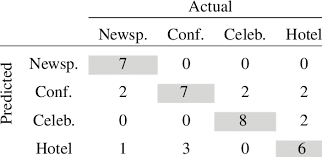

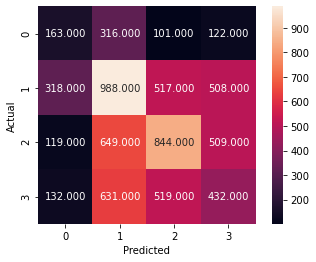

In [64]:
conf= confusion_matrix(y_test, test_pred)
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [65]:
from sklearn import tree
tree = tree.export_text(cart)
print(tree)

|--- feature_2 <= 3039.50
|   |--- feature_2 <= 310.50
|   |   |--- feature_2 <= 47.50
|   |   |   |--- feature_2 <= 21.50
|   |   |   |   |--- feature_0 <= 176243.50
|   |   |   |   |   |--- feature_0 <= 257.00
|   |   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |   |--- feature_0 <= 10.50
|   |   |   |   |   |   |   |   |--- class: rookie
|   |   |   |   |   |   |   |--- feature_0 >  10.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 2.00
|   |   |   |   |   |   |   |   |   |--- class: rookie
|   |   |   |   |   |   |   |   |--- feature_2 >  2.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: proficient
|   |   |   |   |   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 4.25
|   |   |   |   |   |   |   |   |   |   |   |--- class: skilled
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  4.25
|   |   |   |   |   |   |   |   |   |   |   |--- c

In [66]:
from sklearn import tree
tree.plot_tree(cart)

[Text(148.12144963909543, 215.2656, 'X[2] <= 3039.5\ngini = 0.713\nsamples = 16023\nvalue = [1556, 5581, 4968, 3918]'),
 Text(51.00190847065053, 210.9168, 'X[2] <= 310.5\ngini = 0.655\nsamples = 7090\nvalue = [166, 1774, 3242, 1908]'),
 Text(17.396767857892595, 206.56799999999998, 'X[2] <= 47.5\ngini = 0.582\nsamples = 2491\nvalue = [33, 487, 1439, 532]'),
 Text(5.571416465265105, 202.2192, 'X[2] <= 21.5\ngini = 0.447\nsamples = 612\nvalue = [4, 75, 439, 94]'),
 Text(1.9052761985635096, 197.8704, 'X[0] <= 176243.5\ngini = 0.327\nsamples = 241\nvalue = [1, 18, 195, 27]'),
 Text(1.8545929017554608, 193.5216, 'X[0] <= 257.0\ngini = 0.317\nsamples = 239\nvalue = [1, 16, 195, 27]'),
 Text(0.5224735167048478, 189.1728, 'X[2] <= 4.5\ngini = 0.262\nsamples = 184\nvalue = [1, 11, 157, 15]'),
 Text(0.10136659361609777, 184.824, 'X[0] <= 10.5\ngini = 0.571\nsamples = 7\nvalue = [0, 2, 4, 1]'),
 Text(0.05068329680804889, 180.4752, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.152049890

Error in callback <function flush_figures at 0x7f9ce39b3310> (for post_execute):


KeyboardInterrupt: 

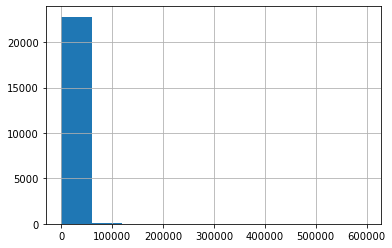

In [67]:
grnew.score.hist()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 999)  
# initializes and runs the decision tree
cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [76]:
train_pred = cart.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, train_pred))
print("confusion_matrix")
print(confusion_matrix(y_train, train_pred))

Accuracy: 0.34125943955563875
confusion_matrix
[[   0 1513   54    0]
 [   0 5458   53    0]
 [   0 4977   10    0]
 [   0 3940   18    0]]


In [77]:
test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.3456610366919045
confusion_matrix
[[   0  667   24    0]
 [   0 2369   32    0]
 [   0 2097    5    0]
 [   0 1669    5    0]]


In [79]:
gr.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105
